# Solution of ODE's

## Population dynamics

To introduce the solution of ODE's we can take the well-know population dynamics example. This equation predicts the evolution of a population $y$ under the constraint that its rate of increase decreases as it approaches a bound of $L$, *i.e.* the population is stable once that maximum value is achieved. It is expressed as:

$$
\frac{dy}{dt}=k(L-y)y
$$

This problem can solved analytically through partial fraction decomposition and direct integration, leading to the closed-form solution presented below. The constant of integration can be computed from the initial state $y_{0}$.

$$
y(t)=\frac{LCe^{kLt}}{1 + Ce^{kLt}}\qquad\text{where}\qquad{}C=\frac{y_{0}}{L-y_{0}}
$$

To start with the computational solution of this problem, we define the problem parameters, the initial condition and the array of time points over which we wish to recover the solution.

In [1]:
k = 1;
L = 1;
y0 = 0.01;
t = linspace(0, 10, 30);

Next we declare a function representing the right-hand side of our ODE and make use of a built-in Runge-Kutta solver `ode45`.

In [2]:
f = @(t, y) k * (L - y) * y;
[t, y_num] = ode45(f, t, y0);

For this introductory case we compute the analytical solution for comparison.

In [3]:
C = y0 / (L - y0);
y_exact = L * C * exp(k * L * t) ./ (1 + C * exp(k * L * t));

Finally we display the solutions.

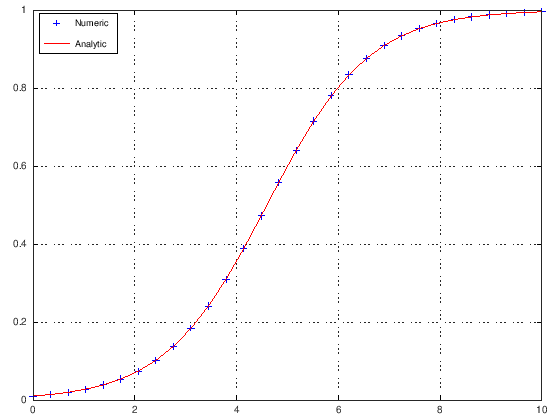

In [4]:
figure;
plot(t, y_num, 'b+'); hold on;
plot(t, y_exact, 'r-'); hold on;
grid on;
set(gca, 'GridLineStyle', ':');
legend('Numeric', 'Analytic', 'Location', 'northwest');

## Pendulum equation

Not let's check the solution of a second order equation. Take by example the damped oscillator, also a traditional example for illustrating second order equations. The balances of forces is given by

$$
m\ddot{x}+c\dot{x}+kx=0
$$

One cannot directly treat this problem, first it must be decomposed in two (this being the order of the original equations) first order equations, one for the position and other for the velocity. Spliting the above equation can be done as follows

$$
\begin{cases}
\dot{y}_{1}=\dot{x}\\
\dot{y}_{2}=-\dfrac{c}{m}\dot{y}_{1}-\dfrac{k}{m}x
\end{cases}
$$

Since this equation is more complex, we define it by defining a normal function, as follows.

In [5]:
function ydot = f(y, t)
    m = 1;
    c = 0.5;
    k = 2;
    
    omega = c / m;
    gamma = k / m;

    ydot = zeros(2, 1);
    ydot(1) = y(2);
    ydot(2) = -omega * y(2) - gamma * y(1);
end

For this problem, the initial state is a vector, with the first element representing the position and the second the angular velocity. Below we define this state `x0` and the array of time points to retrieve the solution.

In [6]:
x0 = [1, 0];
t_range = linspace(0, 20, 100);

To close this introduction, we run the integration of this harmonic oscillator problem. Here we make use of the solver we have made use for the first problem, which is compatible with Matlab, and `LSODE`, which is available in Octave.

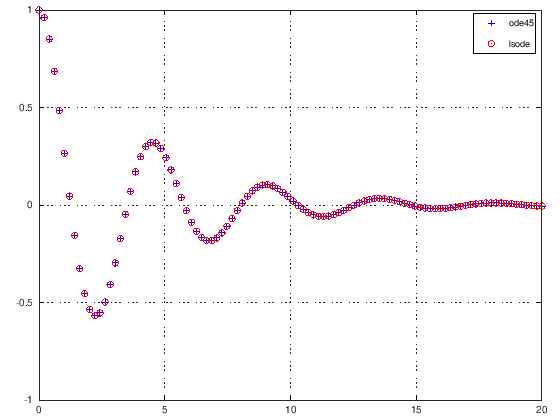

In [7]:
% Matlab compatible.
opt = odeset('RelTol', 1.0e-06, 'AbsTol', 1.0e-10);
[t_ode45, y_ode45] = ode45(@(t, y) f(y, t), t_range, x0, opt);

% Specific to Octave.
y_lsode = lsode('f', x0', (t_range));

figure();
plot(t_ode45, y_ode45(:, 1), 'b+');
hold on;
plot(t_range, y_lsode(:, 1), 'ro');
grid on;
set(gca, 'GridLineStyle', ':');
legend('ode45', 'lsode');